In [70]:
#!pip install geopandas

In [71]:
#setting libraries
import pandas as pd
from plotnine import * 
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [72]:
#reading in file
df = pd.read_csv("../data/cleaned_data/final_data.csv")
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']), crs="EPSG:4326")

In [73]:
#dataset of only the opened in 2013
df_13 = df[df["open_year"] == 2013.0]

In [74]:
#reading in geographic data 
america = gpd.read_file('../data/raw_data/county_shape_file')

In [75]:
#list of counties in DMV
dmv_counties = [
    ('11','001'),  # Washington, D.C.
    ('24', '031'),  # Montgomery County, MD
    ('24', '033'),  # Prince George's County, MD
    ('51', '013'),  # Arlington County, VA
    ('51', '059'),  # Fairfax County, VA
    ('51', '600'),   # Falls Church, VA
    ('51', '510')   # Alexandria, VA
]

In [76]:
#filtering for DMV counties
dmv = america[
    america.apply(lambda x: (x['STATEFP'], x['COUNTYFP']) in dmv_counties, axis=1)
]

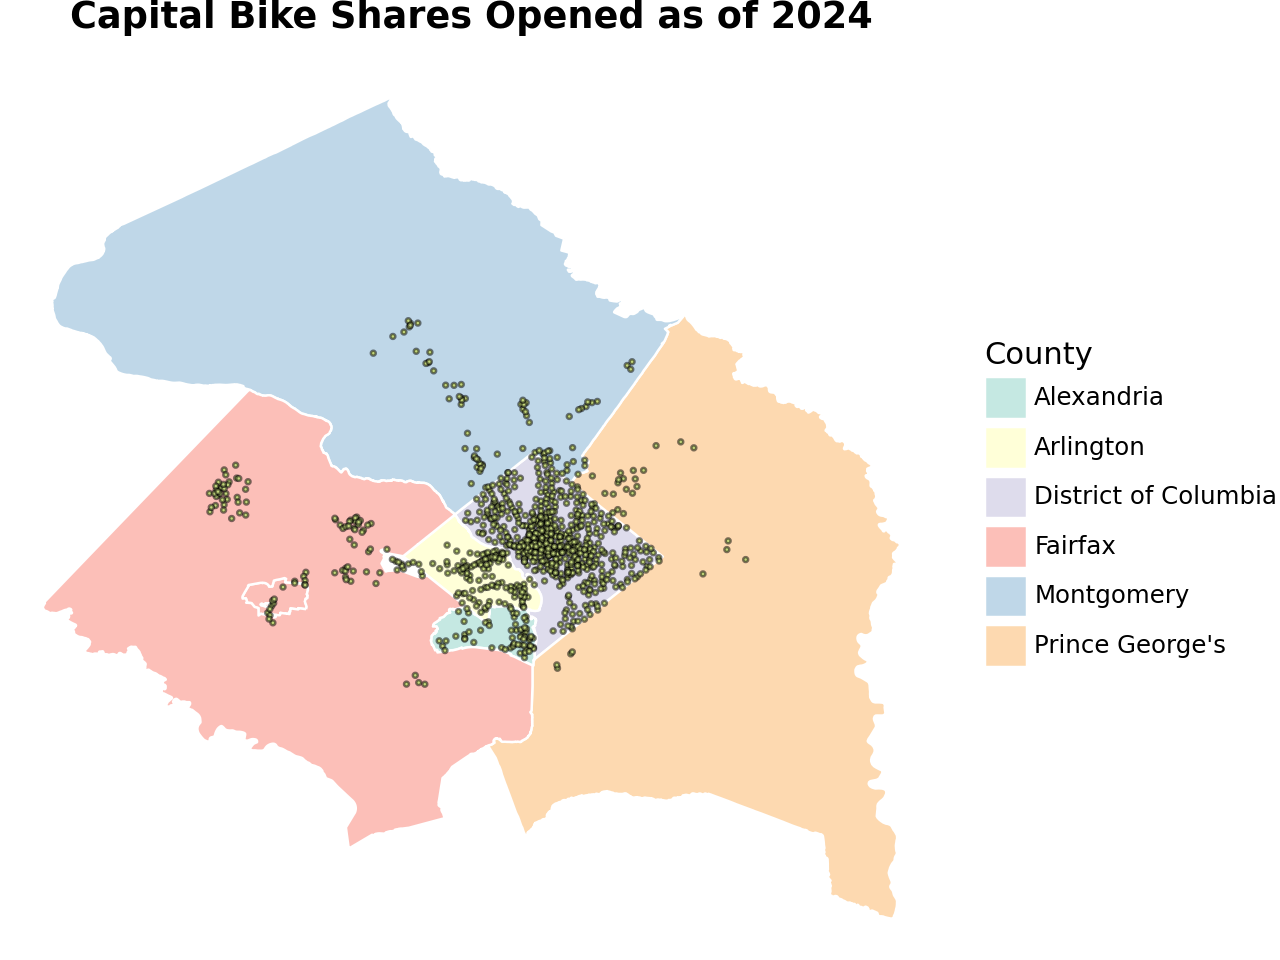

In [77]:
#plot of bikeshares opened as of today
(
ggplot(data = df) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "black",
               fill = "#c3d67aff",
               size = 0.5,
               alpha = 0.5
        ) +
    labs(title = "Capital Bike Shares Opened as of 2024", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    scale_fill_brewer(type="qual", palette="Set3")
)

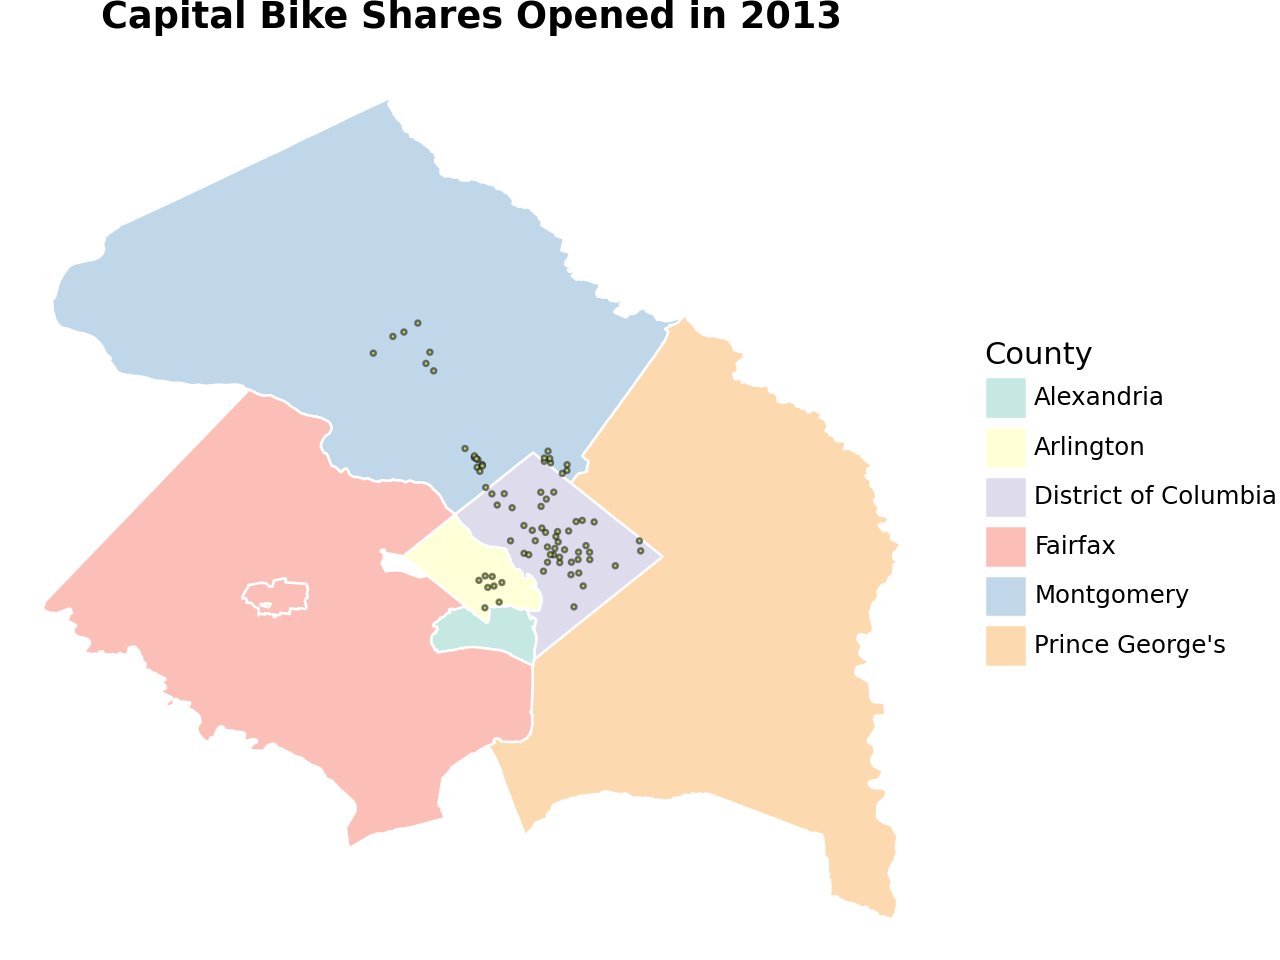

In [78]:
#plot of bikeshares opened in 2013
(
ggplot(data = df_13) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "black",
               fill = "#c3d67aff",
               size = 0.5,
               alpha = 0.5
        ) +
    labs(title = "Capital Bike Shares Opened in 2013", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    scale_fill_brewer(type="qual", palette="Set3")
)

In [79]:
#turned from wide to long
df_13_traffic = df_13.melt(id_vars=['id', 'long', 'lat', 'open_year', 'name', 'opened_station', 'opened_2013'], var_name = "year", value_name = "aadt")

In [80]:
#treat year as category
df_13_traffic['year'] = df_13_traffic['year'].astype('category')

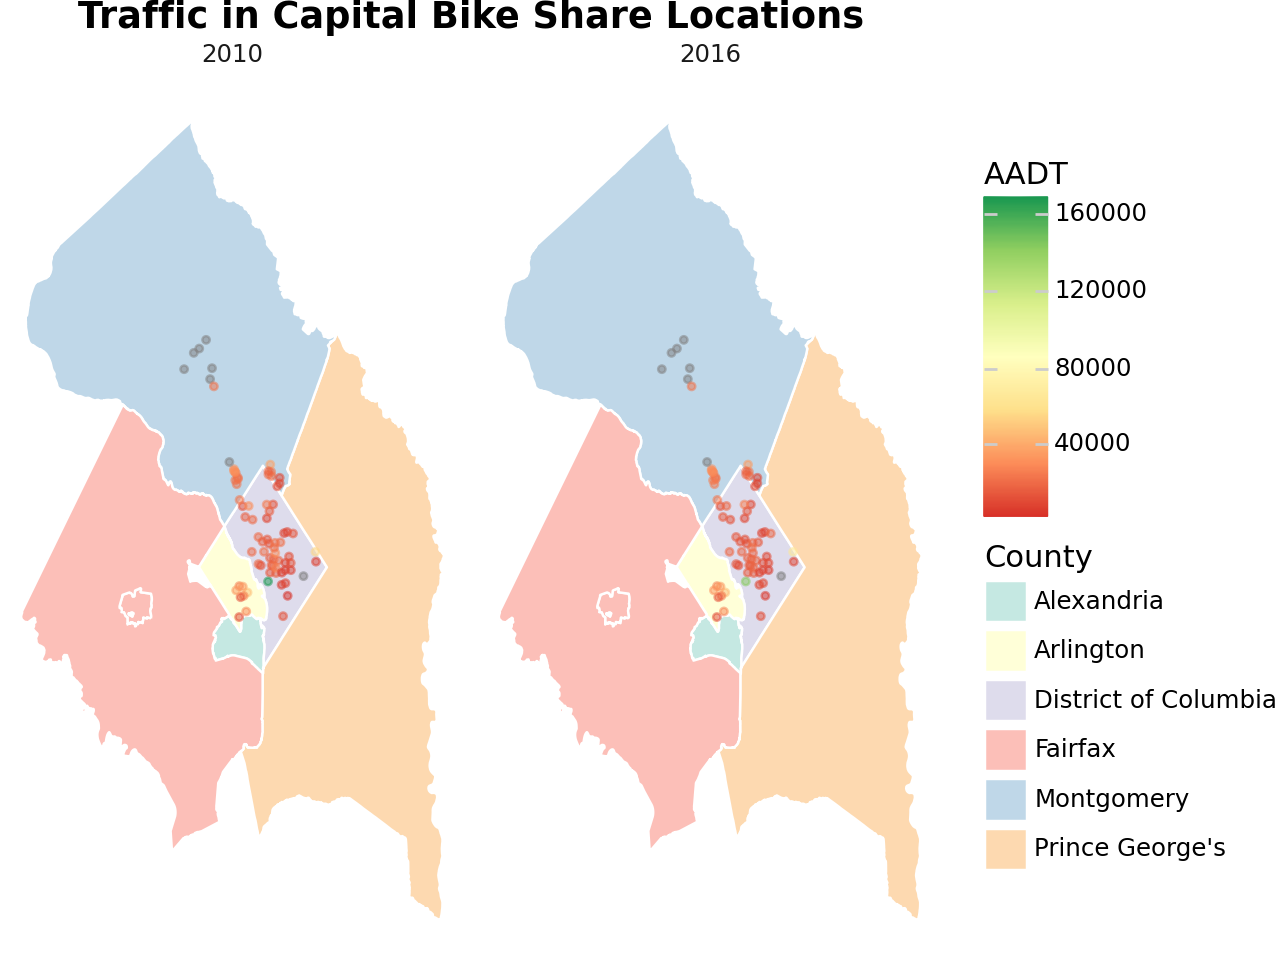

In [81]:
#plot of bikeshares opened in 2013 colored by traffic volume 
(
ggplot(data = df_13_traffic[df_13_traffic['year'].isin(["2010", "2016"])]) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "aadt"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Traffic in Capital Bike Share Locations", fill = "County", color = "AADT") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    facet_grid('~year') +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1) +
    scale_fill_brewer(type="qual", palette="Set3")
)

In [82]:
#computing change in aadt
df_13["change"] = (df_13["2010"]-df_13["2016"])/df_13["2010"] * 100

C:\Users\helen\AppData\Local\Temp\ipykernel_23540\2543595219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


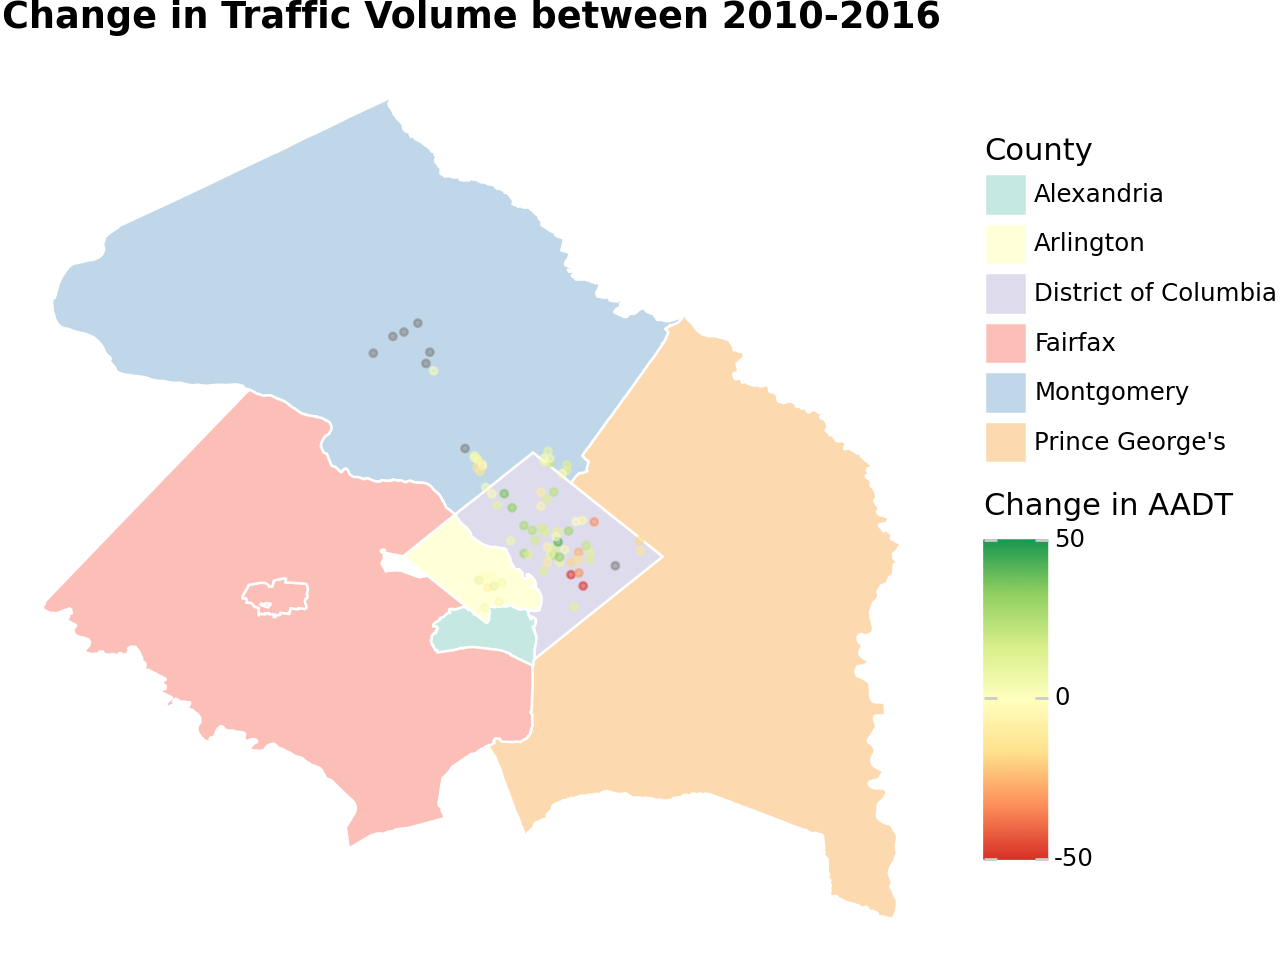

In [83]:
#plot of change in aadt for opened 2013, 2010-2016
(
ggplot(data = df_13) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "change"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Change in Traffic Volume between 2010-2016", fill = "County",
        color = "Change in AADT") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3") +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1,
                        limits=(-50, 50),
                         breaks=[-50, 0, 50])
)

In [84]:
#computing change in aadt - 2007-2019
df_13["change_ex"] = (df_13["2007"]-df_13["2019"])/df_13["2007"] * 100

C:\Users\helen\AppData\Local\Temp\ipykernel_23540\1443632953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


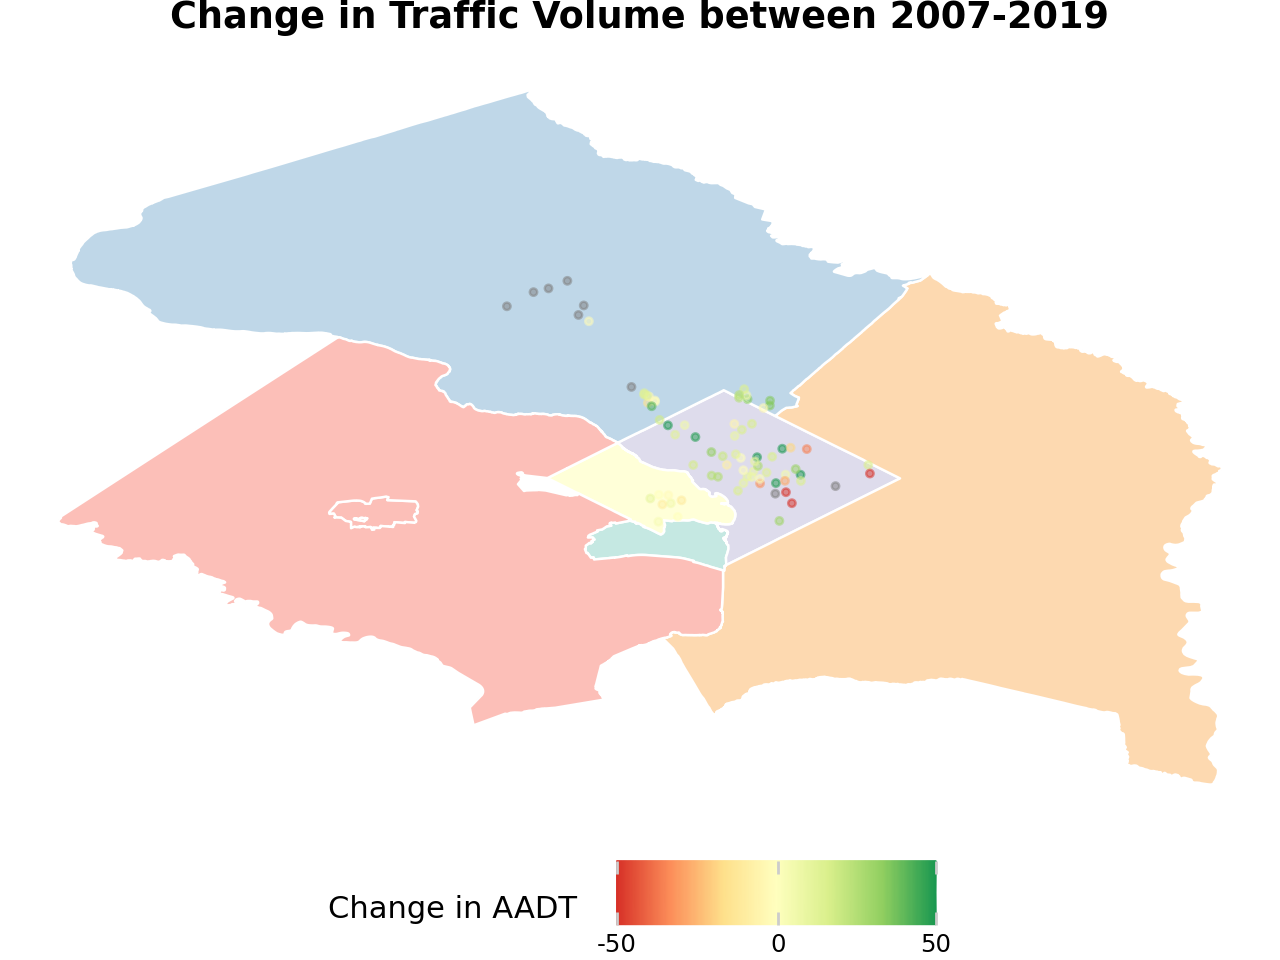

In [85]:
#plot of change in aadt for opened 2013, 2007-2019
(
ggplot(data = df_13) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "change_ex"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Change in Traffic Volume between 2007-2019", fill = "County",
        color = "Change in AADT") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold"),
      legend_position = "bottom"
    )+
    scale_fill_brewer(type="qual", palette="Set3") +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1,
                        limits=(-50, 50),
                         breaks=[-50, 0, 50]) +
    guides(fill = False)
)

In [86]:
#computing change in aadt for all stations opened in 2024
df["change"] = (df["2010"]-df["2016"])/df["2010"] * 100

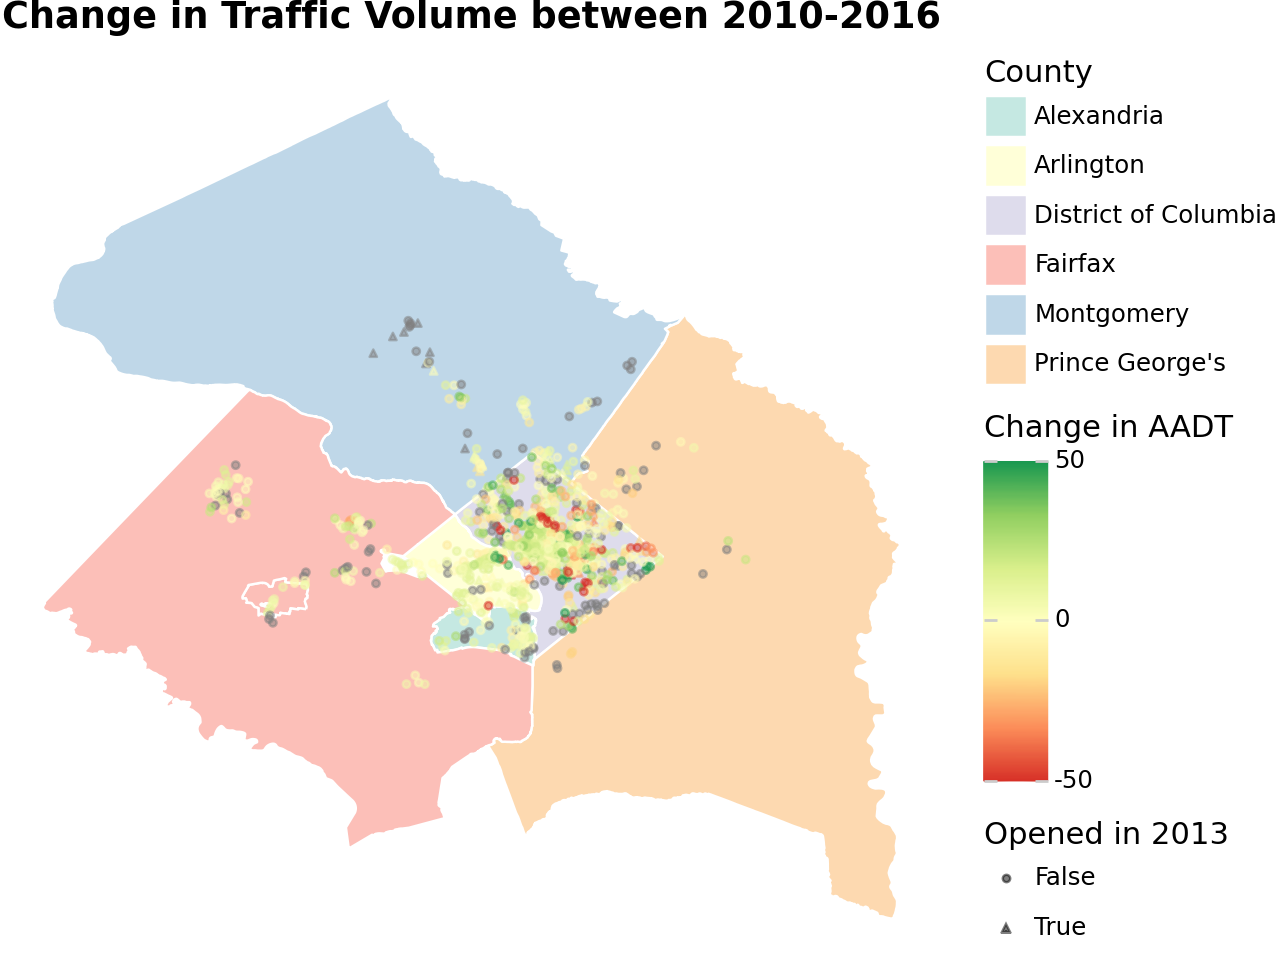

In [87]:
#plot of change in aadt for all, 2010-2016
(
ggplot(data = df) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "change", shape = "opened_2013"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Change in Traffic Volume between 2010-2016", fill = "County",
        color = "Change in AADT", shape = "Opened in 2013") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3") +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1,
                        limits=(-50, 50),
                         breaks=[-50, 0, 50])
)

In [88]:
#computing change in aadt for all stations opened in 2024
df["change_ex"] = (df["2007"]-df["2019"])/df["2007"] * 100

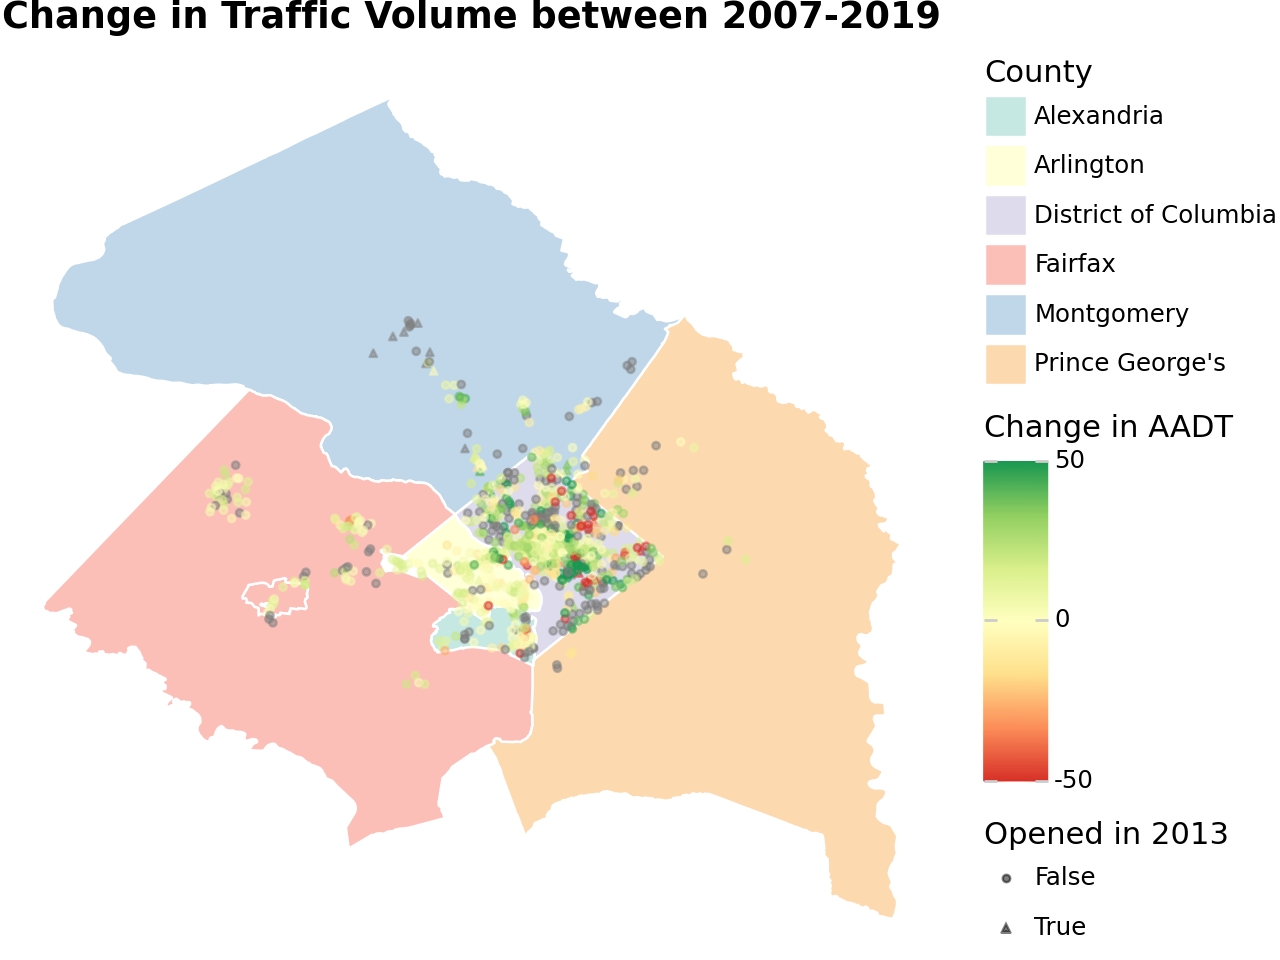

In [89]:
#plot of change in aadt for all, 2007-2019
(
ggplot(data = df) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "change_ex", shape = "opened_2013"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Change in Traffic Volume between 2007-2019", fill = "County",
        color = "Change in AADT", shape = "Opened in 2013") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3") +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1,
                        limits=(-50, 50),
                         breaks=[-50, 0, 50])
)

In [90]:
#getting stations that are unopened
proposed = df[df["opened_station"] == 0]

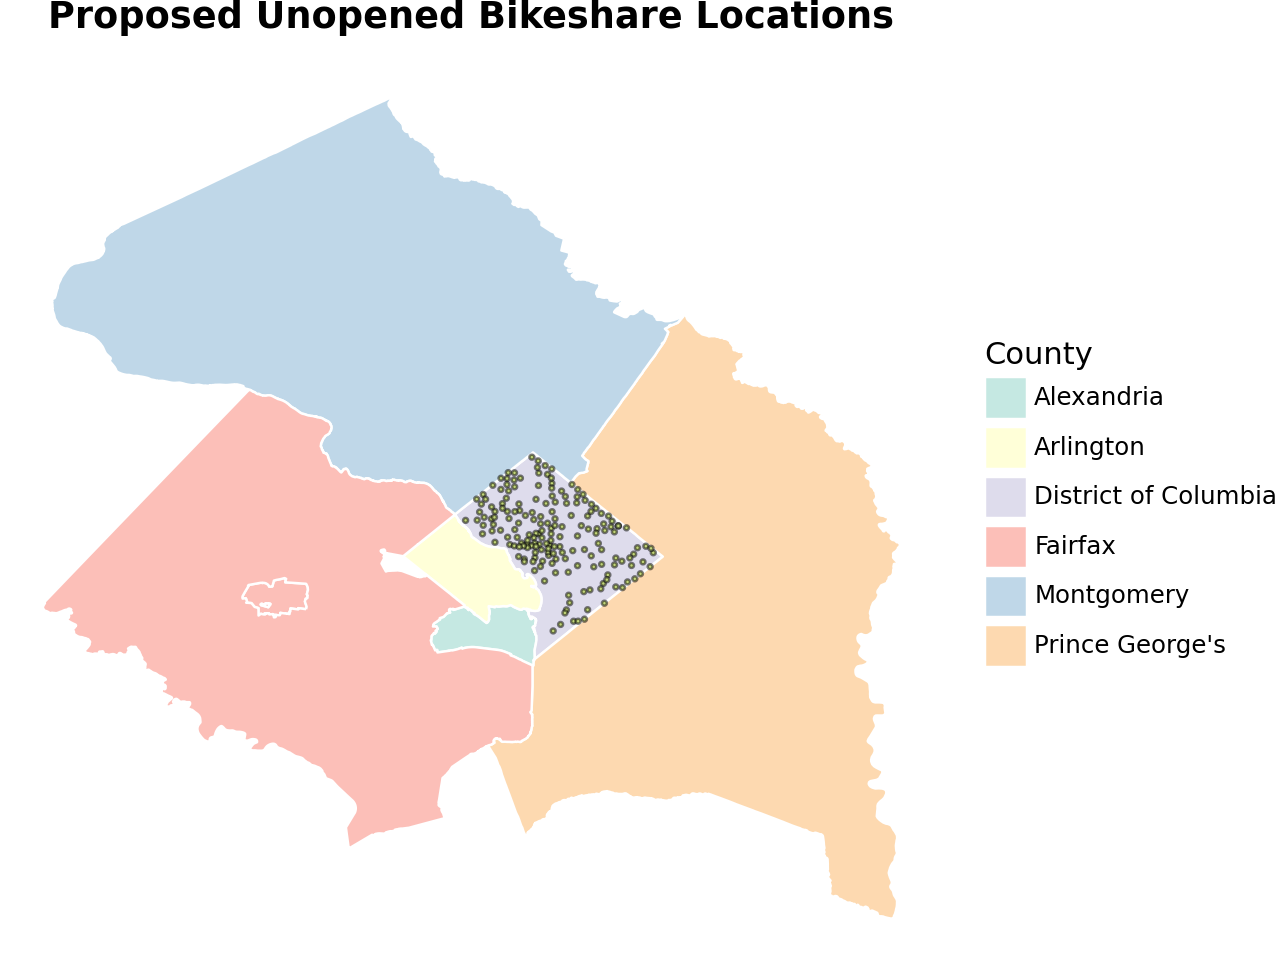

In [91]:
#plot of proposed, unopened bikeshares 
(
ggplot(data = proposed) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "black",
               fill = "#c3d67aff",
               size = 0.5,
               alpha = 0.5
        ) +
    labs(title = "Proposed Unopened Bikeshare Locations", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3")
)

In [92]:
#cleans up .0 after year
df['open_year'] = df['open_year'].replace([np.nan, np.inf, -np.inf], 2000).astype(int).replace(2000, None)

In [93]:
#number of stations opened per year
stations = df['open_year'].value_counts().reset_index().sort_values(by="open_year", ascending=True)

In [94]:
#gets total opened stations per year
stations['sum'] = stations['count'].cumsum()

In [95]:
#compute number of stations with unknown opening years
df['open_year'].isnull().sum()

294

In [96]:
stations

,open_year,count,sum
2,2010,78,78
10,2011,31,109
9,2012,33,142
3,2013,78,220
11,2014,24,244
12,2015,9,253
4,2016,59,312
8,2017,41,353
13,2018,2,355
6,2019,46,401


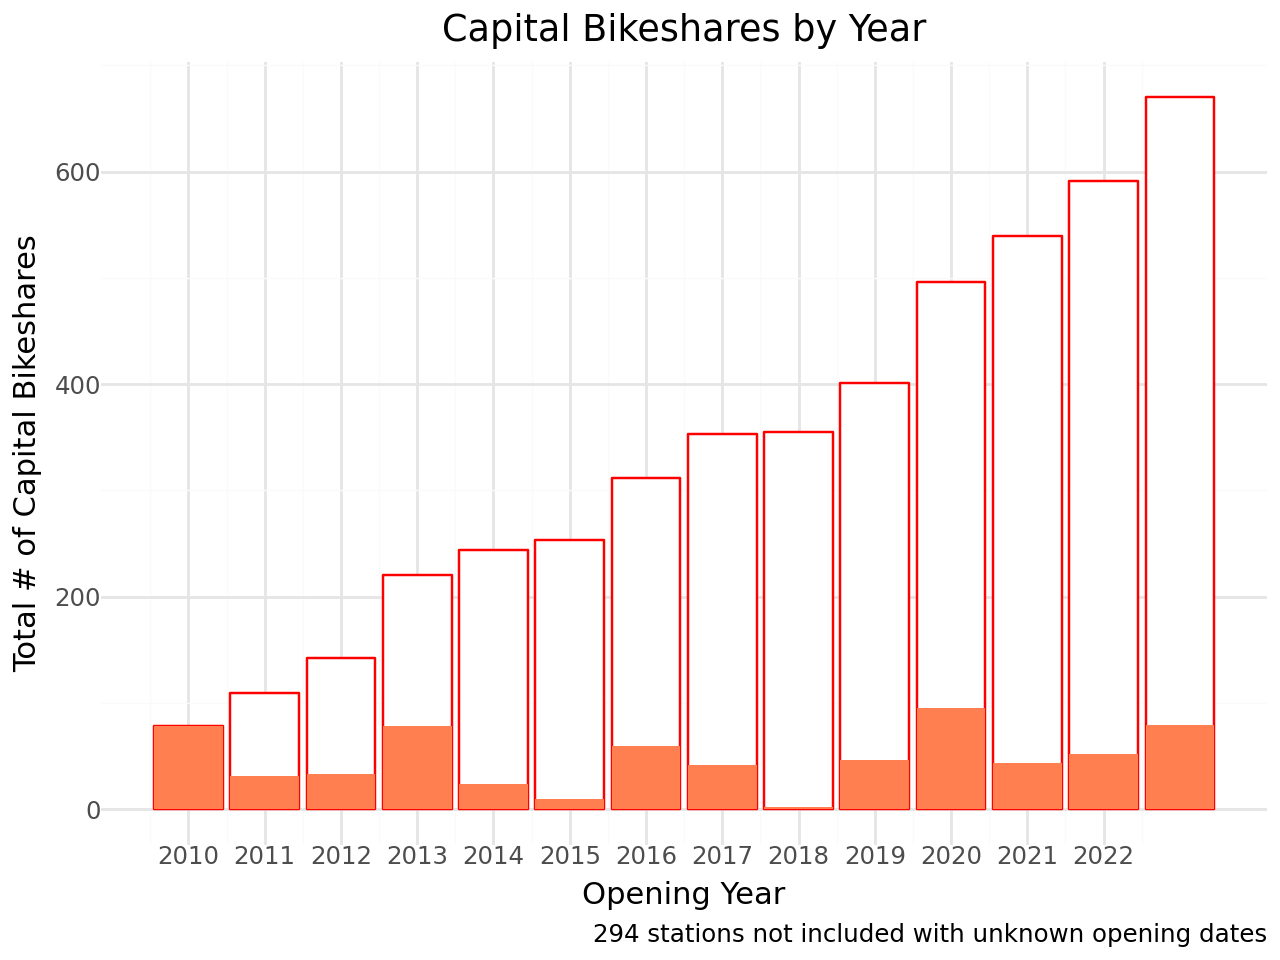

In [97]:
#graph of bikeshares by year
(
ggplot(data = stations) +
    geom_col(aes(x = "open_year", y = "sum"), color = "red", fill = "white") +
    geom_col(aes(x = "open_year", y = "count"), fill = "coral") +
    labs(x = "Opening Year",
        y = "Total # of Capital Bikeshares",
        title = "Capital Bikeshares by Year",
        caption = "294 stations not included with unknown opening dates",) +
    theme_minimal() +
    scale_x_continuous(breaks = range(2010, 2023))
    
)

In [98]:
df.columns

Index(['id', 'long', 'lat', 'open_year', 'name', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', 'opened_station', 'opened_2013', 'change', 'change_ex'],
      dtype='object')

In [99]:
#melting from wide to long
traffic = df.filter(["open_year", '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019']).melt(id_vars= ["open_year"], value_vars =['2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'])

In [100]:
#aggregated traffic vol by year
traffic = traffic.groupby("variable")["value"].agg("mean").reset_index()

In [101]:
traffic

,variable,value
0,2007,25356.834165
1,2008,25479.610699
2,2009,24946.022575
3,2010,22203.951337
4,2011,22005.272034
5,2012,22010.234445
6,2013,21766.652603
7,2014,21317.339169
8,2015,20691.701774
9,2016,20666.597624


In [102]:
#converting it to int for graph
traffic["variable"] = traffic["variable"].astype(int)

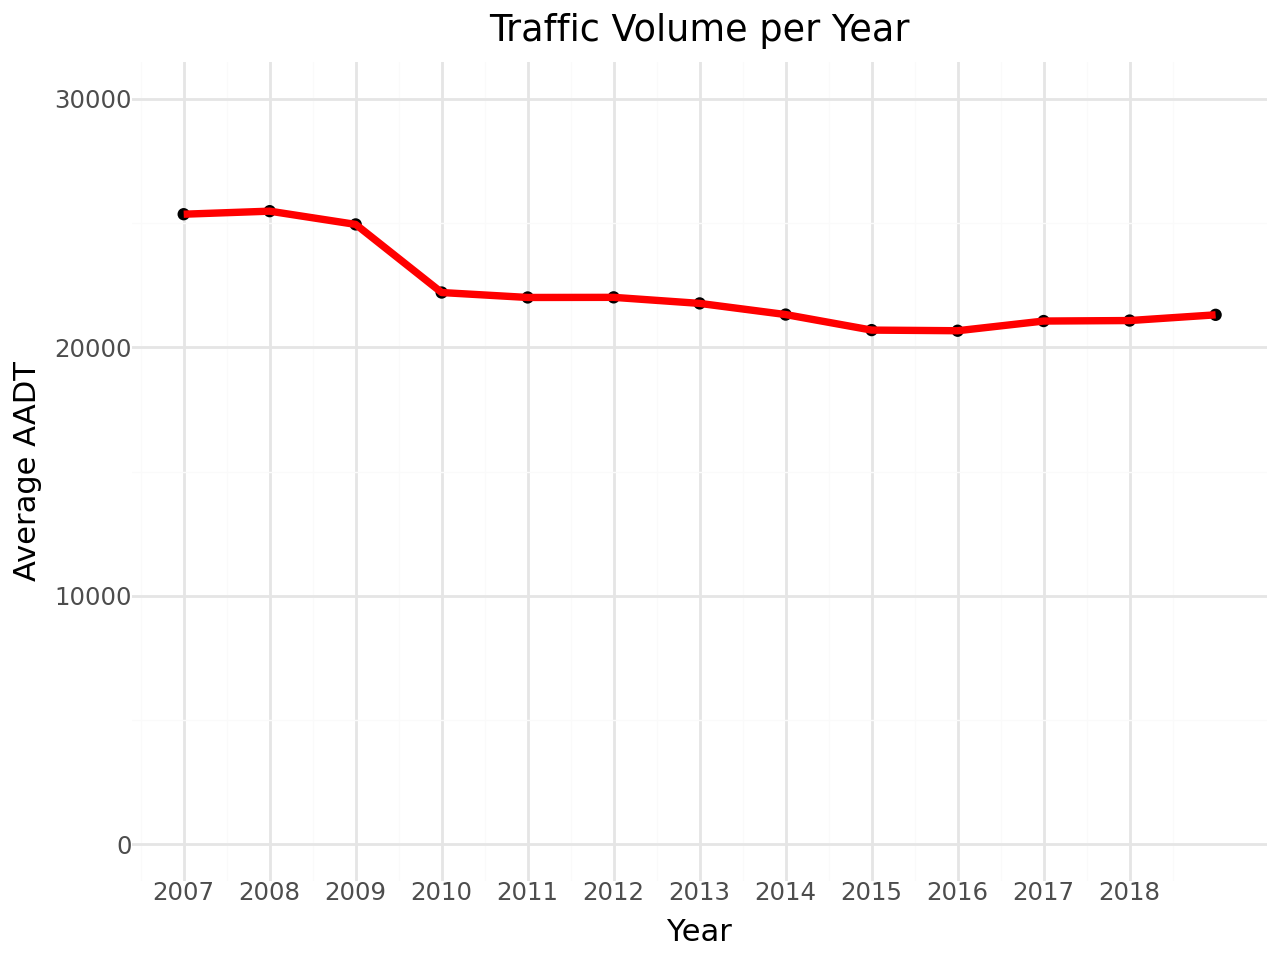

In [103]:
(
ggplot(data = traffic) +
    geom_point(aes(x = "variable", y = "value"), color = "black", size = 1.5) +
    geom_line(aes(x = "variable", y = "value", group = 1), color = "red", size = 1.5) +
    scale_y_continuous(limits = [0, 30000]) +
    scale_x_continuous(limits = [2007, 2019], breaks = range(2007, 2019)) +
    labs(x = "Year",  y = "Average AADT", title = "Traffic Volume per Year") +
    theme_minimal() 
    
)

In [104]:
df.query("opened_station == True").shape

(780, 22)

In [105]:
traffic_na = df.query("opened_station == True").filter(['2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019']).isna().sum().reset_index().rename(columns = {"index": "Year", 0: "Count"}).assign(Percent = lambda x: x["Count"]/780 * 100)

In [106]:
traffic_na

,Year,Count,Percent
0,2007,130,16.666667
1,2008,130,16.666667
2,2009,130,16.666667
3,2010,97,12.435897
4,2011,97,12.435897
5,2012,96,12.307692
6,2013,95,12.179487
7,2014,90,11.538462
8,2015,90,11.538462
9,2016,87,11.153846


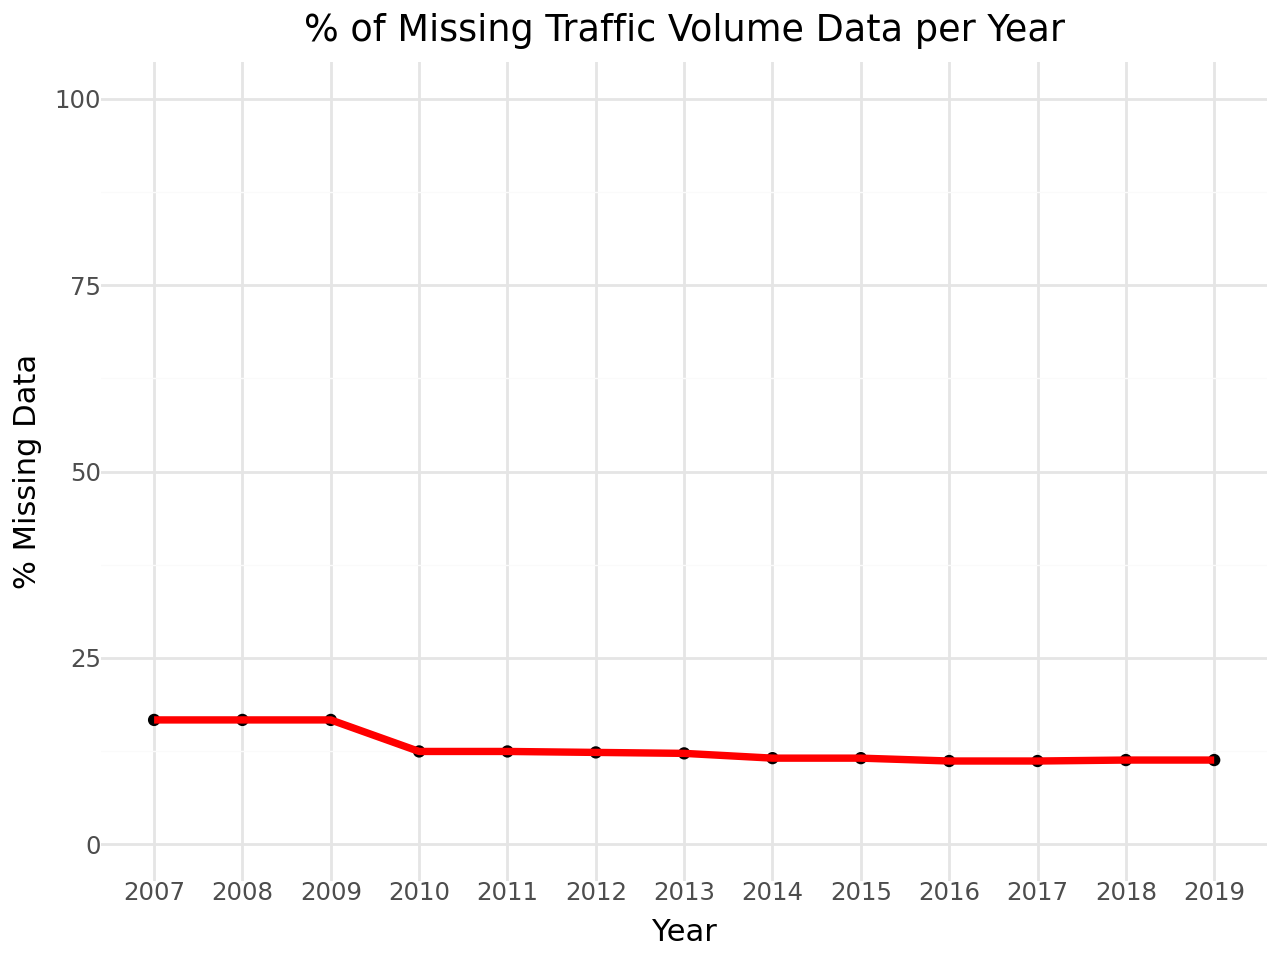

In [107]:
(
ggplot(data = traffic_na) +
    geom_point(aes(x = "Year", y = "Percent"), color = "black", size = 1.5) +
    geom_line(aes(x = "Year", y = "Percent", group = 1), color = "red", size = 1.5) +
    scale_y_continuous(limits = [0, 100]) +
    labs(x = "Year",  y = "% Missing Data", title = "% of Missing Traffic Volume Data per Year") +
    theme_minimal() 
    
)